# Mutation Rate and Mutation Frequency analysis 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Proteogenomic landscape of breast cancer (CPTAC, Cell 2020)")

# TRIPLE-NEGATIVE 

In [3]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_Krug_et_al_Cell_2020_TN.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]
data_mutation_ductal_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,CPT000814,CPT000814,SZT2,1,43908878,43908878,Missense_Mutation,SNP,G,G,C,c.8268G>C,p.K2756N,2756/3375,ENST00000562955,62769
1,CPT000814,CPT000814,AGBL4,1,49283877,49283877,Intron,SNP,A,A,C,c.634+48986T>G,NaN,NaN,ENST00000371839,1491059
2,CPT000814,CPT000814,PTGER3,1,71512957,71512957,Missense_Mutation,SNP,C,C,T,c.304G>A,p.G102R,102/390,ENST00000306666,195456
3,CPT000814,CPT000814,HFM1,1,91859745,91859745,Silent,SNP,G,G,A,c.399C>T,p.G133=,133/1435,ENST00000370425,144104
4,CPT000814,CPT000814,PRUNE,1,150999720,150999720,Missense_Mutation,SNP,G,G,A,c.691G>A,p.E231K,231/453,ENST00000271620,27294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17602,X20BR008,X20BR008,FAAH2,X,57318997,57318998,Nonsense_Mutation,INS,-,-,GAATTGTCAAGTACAGGT,ENST00000374900.4:c.262_275+4dup,p.G87GIVKYR*,87/532,ENST00000374900,202491
17603,X20BR008,X20BR008,PLS3,X,114869345,114869345,Silent,SNP,A,A,G,c.735A>G,p.L245=,245/630,ENST00000355899,89681
17604,X20BR008,X20BR008,IGSF1,X,130413268,130413268,Missense_Mutation,SNP,A,A,T,c.1694T>A,p.I565K,565/1336,ENST00000361420,126198
17605,X20BR008,X20BR008,FHL1,X,135291593,135291593,Silent,SNP,C,C,A,c.880C>A,p.R294=,294/323,ENST00000345434,63960


In [4]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

### Mutation Rate analysis

In [5]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1
data_mutation_ductal_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,Mutation_length
0,CPT000814,CPT000814,SZT2,1,43908878,43908878,Missense_Mutation,SNP,G,G,C,c.8268G>C,p.K2756N,2756/3375,ENST00000562955,62769,1
1,CPT000814,CPT000814,AGBL4,1,49283877,49283877,Intron,SNP,A,A,C,c.634+48986T>G,NaN,NaN,ENST00000371839,1491059,1
2,CPT000814,CPT000814,PTGER3,1,71512957,71512957,Missense_Mutation,SNP,C,C,T,c.304G>A,p.G102R,102/390,ENST00000306666,195456,1
3,CPT000814,CPT000814,HFM1,1,91859745,91859745,Silent,SNP,G,G,A,c.399C>T,p.G133=,133/1435,ENST00000370425,144104,1
4,CPT000814,CPT000814,PRUNE,1,150999720,150999720,Missense_Mutation,SNP,G,G,A,c.691G>A,p.E231K,231/453,ENST00000271620,27294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17602,X20BR008,X20BR008,FAAH2,X,57318997,57318998,Nonsense_Mutation,INS,-,-,GAATTGTCAAGTACAGGT,ENST00000374900.4:c.262_275+4dup,p.G87GIVKYR*,87/532,ENST00000374900,202491,2
17603,X20BR008,X20BR008,PLS3,X,114869345,114869345,Silent,SNP,A,A,G,c.735A>G,p.L245=,245/630,ENST00000355899,89681,1
17604,X20BR008,X20BR008,IGSF1,X,130413268,130413268,Missense_Mutation,SNP,A,A,T,c.1694T>A,p.I565K,565/1336,ENST00000361420,126198,1
17605,X20BR008,X20BR008,FHL1,X,135291593,135291593,Silent,SNP,C,C,A,c.880C>A,p.R294=,294/323,ENST00000345434,63960,1


In [6]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

28

In [7]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]
pts_mutation_length_ductal_TN

,PATIENT_ID,Mutation_length
0,CPT000814,1
1,CPT000814,1
2,CPT000814,1
3,CPT000814,1
4,CPT000814,1
...,...,...
17602,X20BR008,2
17603,X20BR008,1
17604,X20BR008,1
17605,X20BR008,1


In [8]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)
mutation_ductal_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases
0,CPT000814,126
1,CPT001846,129
2,X01BR001,108
3,X01BR009,205
4,X01BR010,105
5,X01BR020,265
6,X01BR026,109
7,X01BR027,251
8,X01BR031,159
9,X01BR040,59


In [9]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]
gene_length_for_each_mutation_ductal_TN

,Hugo_Symbol,Gene_length
0,SZT2,62769
1,AGBL4,1491059
2,PTGER3,195456
3,HFM1,144104
4,PRUNE,27294
...,...,...
17602,FAAH2,202491
17603,PLS3,89681
17604,IGSF1,126198
17605,FHL1,63960


In [10]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

8692

In the dataset there are 8692 distinct genes. 

In [11]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()
mutation_ductal_TN_group_by_gene

,Hugo_Symbol,Gene_length
0,A1CF,86267
1,A2M,48566
2,A2ML1,64530
3,AACS,77949
4,AADACL2,27424
...,...,...
8687,ZSWIM8,16212
8688,ZUFSP,33177
8689,ZWILCH,44819
8690,ZXDA,5204


In [12]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()
total_GeneLength_ductal_TN

796501608

In [13]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN
mutation_ductal_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate
0,CPT000814,126,1.581918e-07
1,CPT001846,129,1.619582e-07
2,X01BR001,108,1.355929e-07
3,X01BR009,205,2.573755e-07
4,X01BR010,105,1.318265e-07
5,X01BR020,265,3.327049e-07
6,X01BR026,109,1.368484e-07
7,X01BR027,251,3.151281e-07
8,X01BR031,159,1.996229e-07
9,X01BR040,59,7.407392e-08


In [14]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000
mutation_ductal_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate,Mutation_rate*10^6
0,CPT000814,126,1.581918e-07,0.158192
1,CPT001846,129,1.619582e-07,0.161958
2,X01BR001,108,1.355929e-07,0.135593
3,X01BR009,205,2.573755e-07,0.257376
4,X01BR010,105,1.318265e-07,0.131826
5,X01BR020,265,3.327049e-07,0.332705
6,X01BR026,109,1.368484e-07,0.136848
7,X01BR027,251,3.151281e-07,0.315128
8,X01BR031,159,1.996229e-07,0.199623
9,X01BR040,59,7.407392e-08,0.074074


In [15]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)
mutation_ductal_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate,Mutation_rate*10^6
11,X01BR043,13093,1.643813e-05,16.438134
17,X11BR003,1128,1.416193e-06,1.416193
13,X05BR029,613,7.696155e-07,0.769616
25,X20BR005,385,4.833637e-07,0.483364
15,X05BR043,357,4.482100e-07,0.448210
26,X20BR007,296,3.716251e-07,0.371625
14,X05BR042,284,3.565592e-07,0.356559
5,X01BR020,265,3.327049e-07,0.332705
24,X18BR002,251,3.151281e-07,0.315128
7,X01BR027,251,3.151281e-07,0.315128


In [16]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]
patient_mutation_rate_ductal_TN

,PATIENT_ID,Mutation_rate*10^6
11,X01BR043,16.438134
17,X11BR003,1.416193
13,X05BR029,0.769616
25,X20BR005,0.483364
15,X05BR043,0.448210
26,X20BR007,0.371625
14,X05BR042,0.356559
5,X01BR020,0.332705
24,X18BR002,0.315128
7,X01BR027,0.315128


In [17]:
patients=np.arange(0,28,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

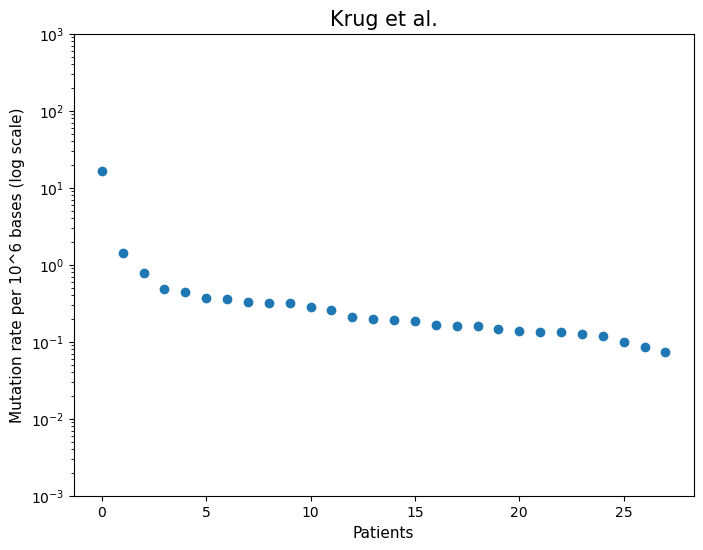

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Krug et al.", fontsize=15)
plt.show()

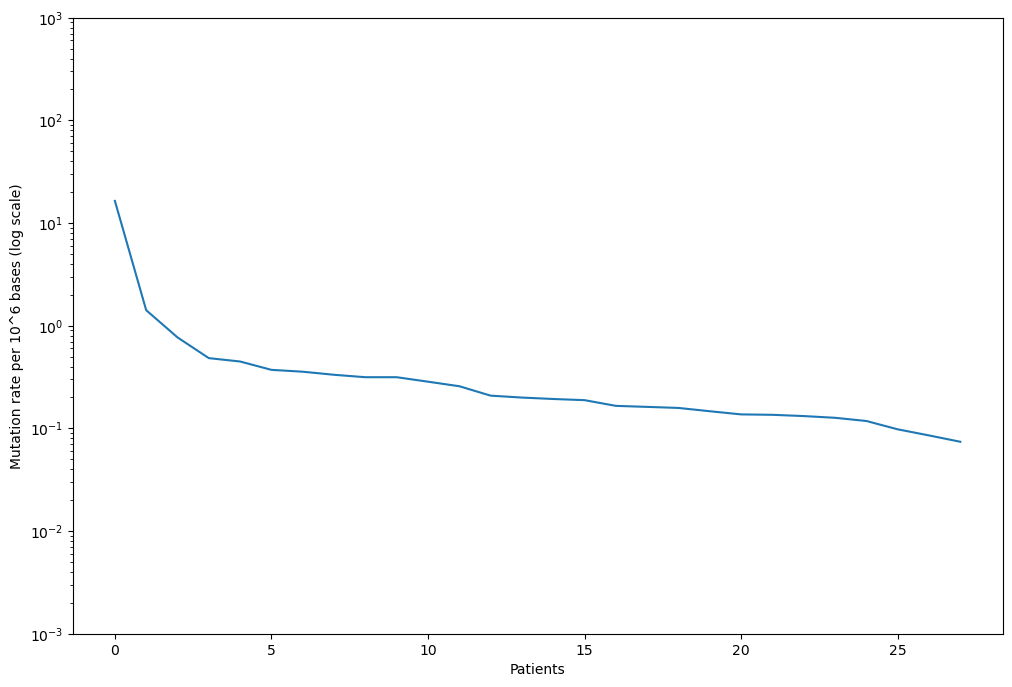

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [20]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]
genes_patients_ductal_TN

,PATIENT_ID,Hugo_Symbol
0,CPT000814,SZT2
1,CPT000814,AGBL4
2,CPT000814,PTGER3
3,CPT000814,HFM1
4,CPT000814,PRUNE
...,...,...
17602,X20BR008,FAAH2
17603,X20BR008,PLS3
17604,X20BR008,IGSF1
17605,X20BR008,FHL1


In [21]:
# check if there are duplicate rows 
genes_patients_ductal_TN.duplicated().sum()

6421

In [22]:
# drop duplicates
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()
genes_patients_ductal_TN

,PATIENT_ID,Hugo_Symbol
0,CPT000814,SZT2
1,CPT000814,AGBL4
2,CPT000814,PTGER3
3,CPT000814,HFM1
4,CPT000814,PRUNE
...,...,...
17602,X20BR008,FAAH2
17603,X20BR008,PLS3
17604,X20BR008,IGSF1
17605,X20BR008,FHL1


In [23]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)
n_of_pts_per_gene_ductal_TN

,Hugo_Symbol,Num_pts_per_gene
0,A1CF,1
1,A2M,1
2,A2ML1,1
3,AACS,2
4,AADACL2,1
...,...,...
8687,ZSWIM8,2
8688,ZUFSP,1
8689,ZWILCH,1
8690,ZXDA,1


In [24]:
tot_pts_ductal_TN = 28

In [25]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN
n_of_pts_per_gene_ductal_TN

,Hugo_Symbol,Num_pts_per_gene,Mutation_frequency (%)
0,A1CF,1,3.571429
1,A2M,1,3.571429
2,A2ML1,1,3.571429
3,AACS,2,7.142857
4,AADACL2,1,3.571429
...,...,...,...
8687,ZSWIM8,2,7.142857
8688,ZUFSP,1,3.571429
8689,ZWILCH,1,3.571429
8690,ZXDA,1,3.571429


In [26]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)
n_of_pts_per_gene_ductal_TN

,Hugo_Symbol,Num_pts_per_gene,Mutation_frequency (%)
7771,TP53,22,78.571429
5629,PIK3CA,10,35.714286
7955,TTN,10,35.714286
2127,DNAH7,7,25.000000
470,APOB,7,25.000000
...,...,...,...
3253,HDHD3,1,3.571429
3252,HDHD1,1,3.571429
3251,HDGFRP2,1,3.571429
3249,HDDC2,1,3.571429


In [27]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]
gene_mutation_frequency_ductal_TN

,Hugo_Symbol,Mutation_frequency (%)
7771,TP53,78.571429
5629,PIK3CA,35.714286
7955,TTN,35.714286
2127,DNAH7,25.000000
470,APOB,25.000000
...,...,...
3253,HDHD3,3.571429
3252,HDHD1,3.571429
3251,HDGFRP2,3.571429
3249,HDDC2,3.571429


In [28]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)
highest_mutated_genes_ductal_TN

,Hugo_Symbol,Mutation_frequency (%)
7771,TP53,78.571429
5629,PIK3CA,35.714286
7955,TTN,35.714286
2127,DNAH7,25.000000
470,APOB,25.000000
2216,DST,21.428571
2834,FSIP2,21.428571
1435,CENPF,17.857143
4249,MACF1,17.857143
7513,TENM4,17.857143


In [29]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

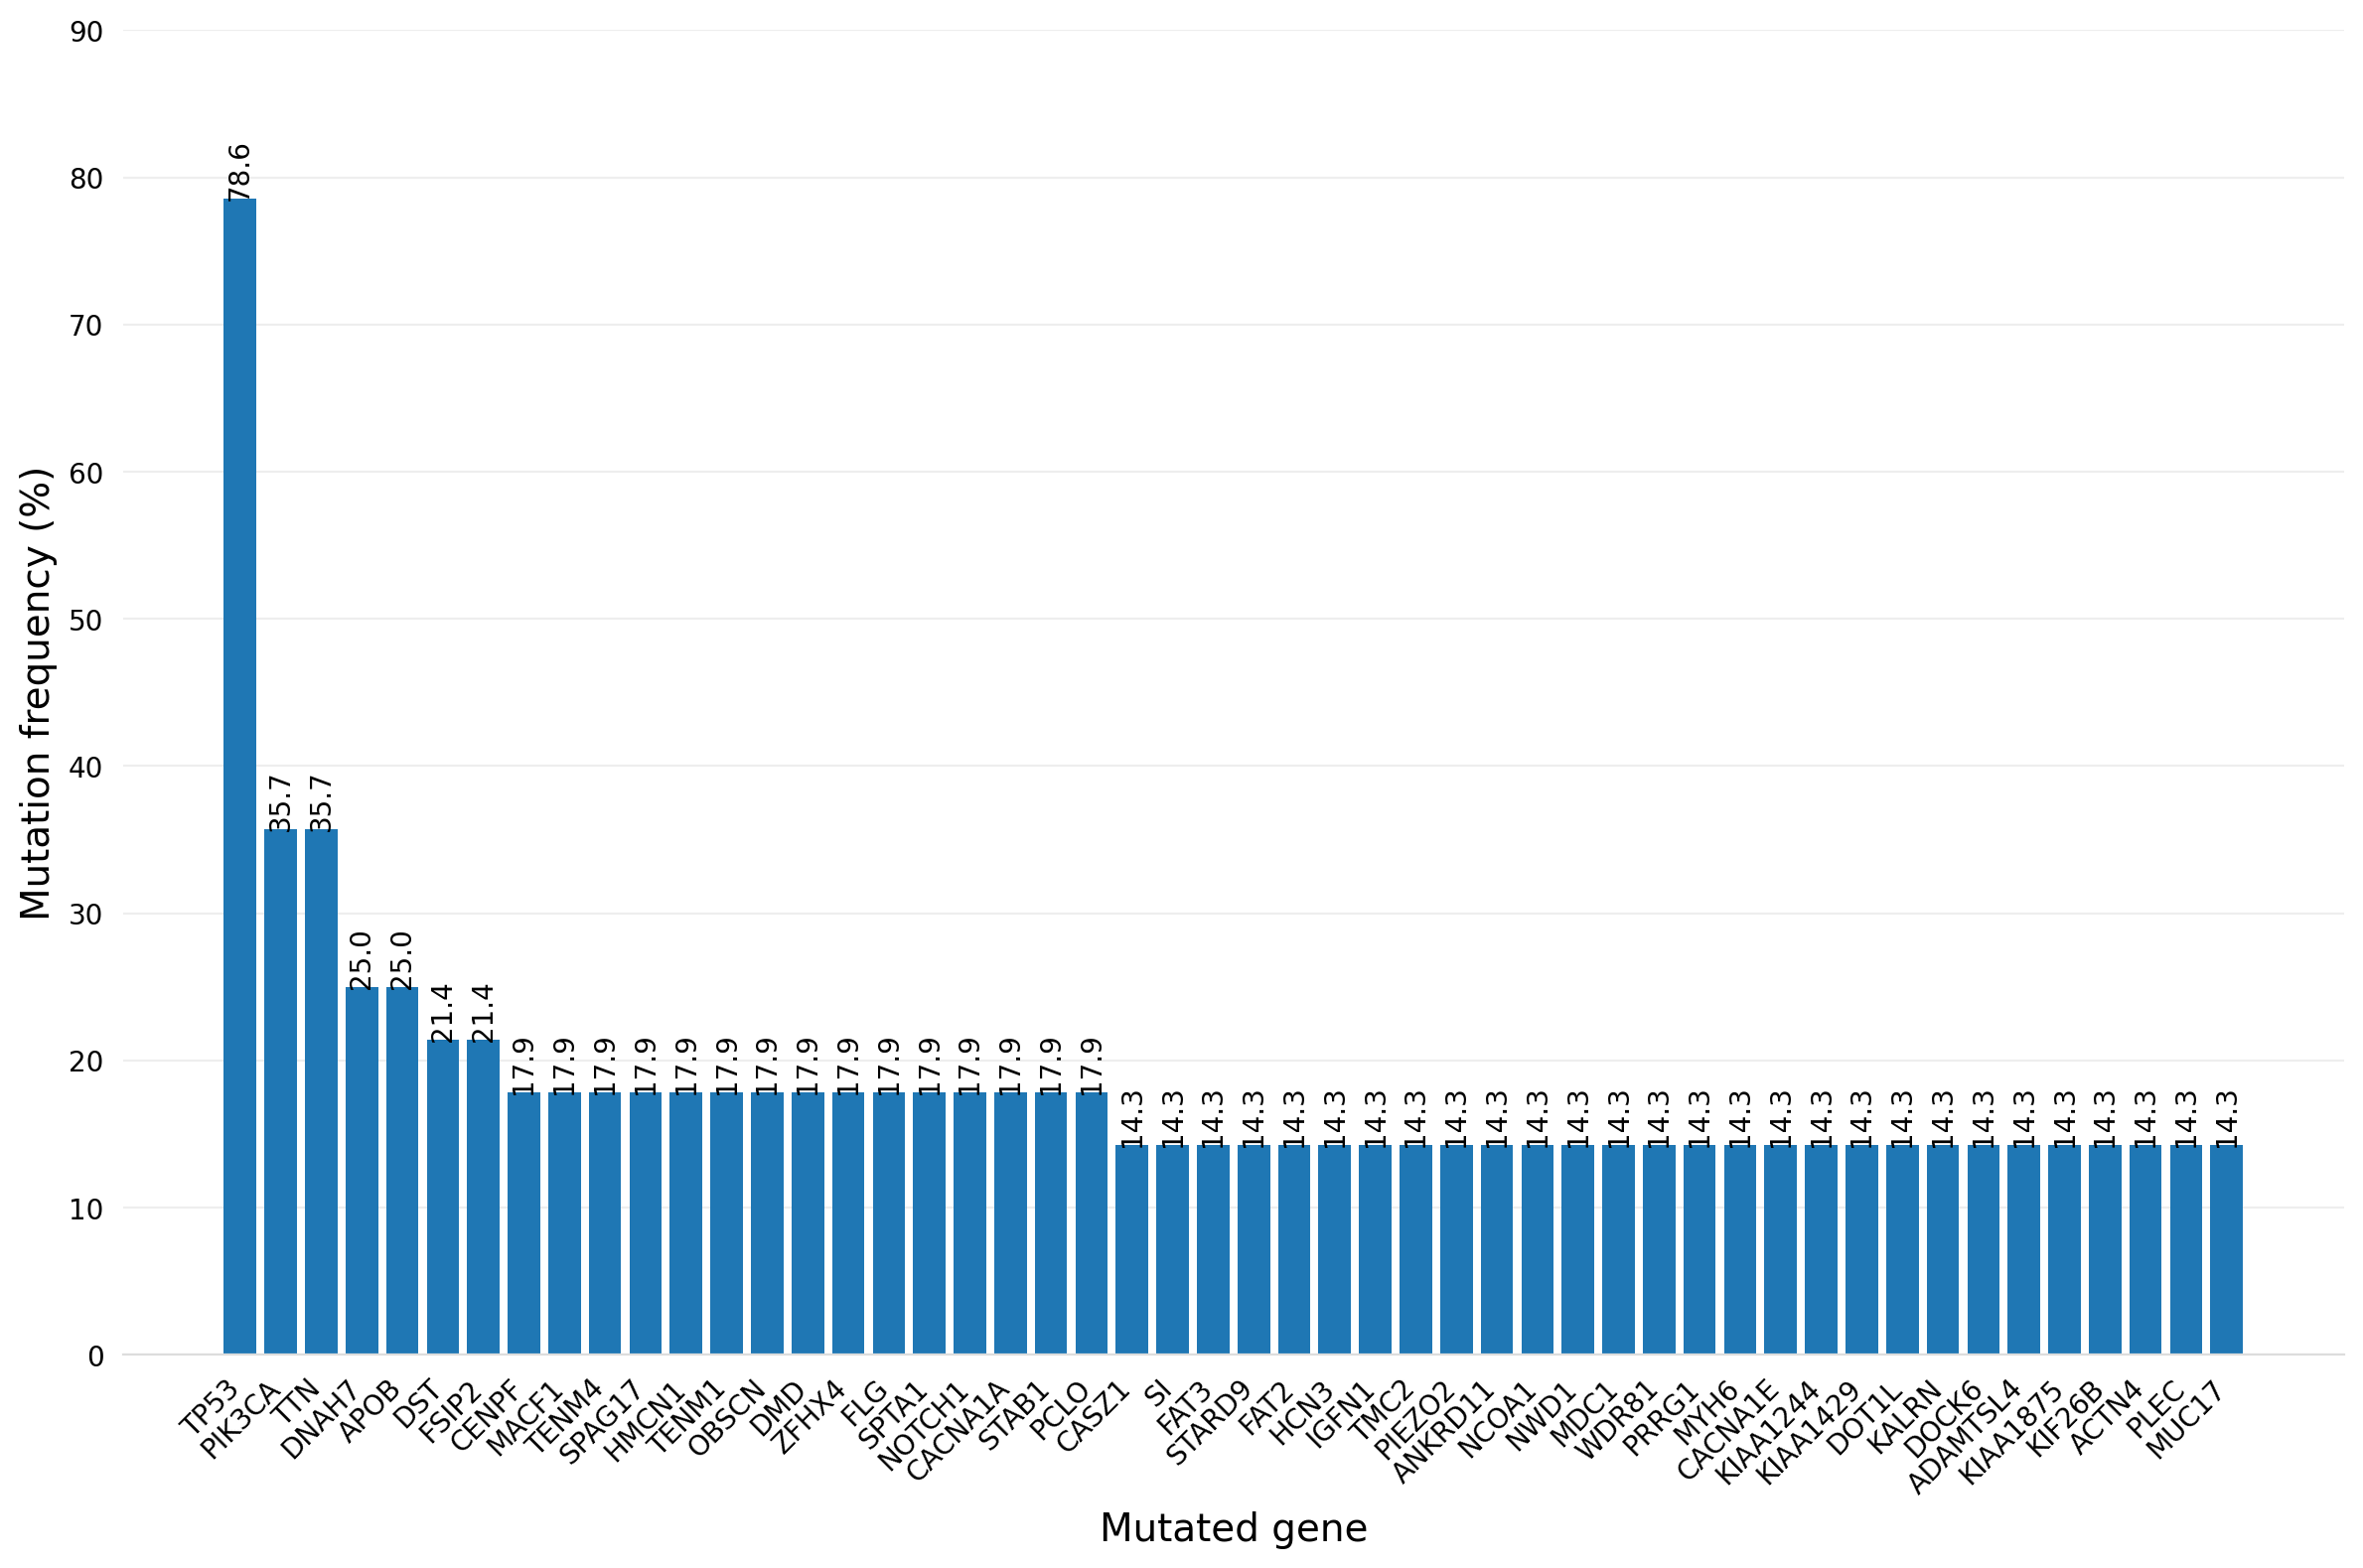

In [30]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# NON TRIPLE-NEGATIVE 

In [31]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_Krug_et_al_Cell_2020_NON_TN.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,X01BR008,X01BR008,RUNX3,1,25254183,25254183,Silent,SNP,C,C,A,c.321G>T,p.V107=,107/415,ENST00000308873,65611
1,X01BR008,X01BR008,NCDN,1,36031009,36031009,Silent,SNP,C,C,A,c.1935C>A,p.T645=,645/729,ENST00000356090,9802
2,X01BR008,X01BR008,PLK3,1,45266324,45266324,Silent,SNP,C,C,G,c.189C>G,p.L63=,63/646,ENST00000372201,5766
3,X01BR008,X01BR008,CDCP2,1,54605471,54605471,Missense_Mutation,SNP,C,C,A,c.1072G>T,p.D358Y,358/449,ENST00000371330,20697
4,X01BR008,X01BR008,DEPDC1,1,68948560,68948560,Missense_Mutation,SNP,C,C,A,c.931G>T,p.V311F,311/811,ENST00000456315,23070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11406,X22BR006,X22BR006,ZNF652,17,47375881,47375894,Frame_Shift_Del,DEL,GGCGGGAGGTGAGG,GGCGGGAGGTGAGG,-,c.1702_1715del,p.P568Tfs*6,568-572/606,ENST00000362063,73268
11407,X22BR006,X22BR006,GALK1,17,73754610,73754610,Silent,SNP,C,C,T,c.864G>A,p.T288=,288/392,ENST00000225614,14118
11408,X22BR006,X22BR006,ZNF584,19,58928243,58928243,Missense_Mutation,SNP,C,C,A,c.358C>A,p.Q120K,120/421,ENST00000306910,16824
11409,X22BR006,X22BR006,ASXL1,20,31022238,31022238,Nonsense_Mutation,SNP,C,C,T,c.1723C>T,p.Q575*,575/1541,ENST00000375687,80968


In [32]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

### Mutation Rate analysis

In [33]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,Mutation_length
0,X01BR008,X01BR008,RUNX3,1,25254183,25254183,Silent,SNP,C,C,A,c.321G>T,p.V107=,107/415,ENST00000308873,65611,1
1,X01BR008,X01BR008,NCDN,1,36031009,36031009,Silent,SNP,C,C,A,c.1935C>A,p.T645=,645/729,ENST00000356090,9802,1
2,X01BR008,X01BR008,PLK3,1,45266324,45266324,Silent,SNP,C,C,G,c.189C>G,p.L63=,63/646,ENST00000372201,5766,1
3,X01BR008,X01BR008,CDCP2,1,54605471,54605471,Missense_Mutation,SNP,C,C,A,c.1072G>T,p.D358Y,358/449,ENST00000371330,20697,1
4,X01BR008,X01BR008,DEPDC1,1,68948560,68948560,Missense_Mutation,SNP,C,C,A,c.931G>T,p.V311F,311/811,ENST00000456315,23070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11406,X22BR006,X22BR006,ZNF652,17,47375881,47375894,Frame_Shift_Del,DEL,GGCGGGAGGTGAGG,GGCGGGAGGTGAGG,-,c.1702_1715del,p.P568Tfs*6,568-572/606,ENST00000362063,73268,14
11407,X22BR006,X22BR006,GALK1,17,73754610,73754610,Silent,SNP,C,C,T,c.864G>A,p.T288=,288/392,ENST00000225614,14118,1
11408,X22BR006,X22BR006,ZNF584,19,58928243,58928243,Missense_Mutation,SNP,C,C,A,c.358C>A,p.Q120K,120/421,ENST00000306910,16824,1
11409,X22BR006,X22BR006,ASXL1,20,31022238,31022238,Nonsense_Mutation,SNP,C,C,T,c.1723C>T,p.Q575*,575/1541,ENST00000375687,80968,1


In [34]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

94

In [35]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]
pts_mutation_length_ductal_NON_TN

,PATIENT_ID,Mutation_length
0,X01BR008,1
1,X01BR008,1
2,X01BR008,1
3,X01BR008,1
4,X01BR008,1
...,...,...
11406,X22BR006,14
11407,X22BR006,1
11408,X22BR006,1
11409,X22BR006,1


In [36]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)
mutation_ductal_NON_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases
0,X01BR008,210
1,X01BR015,80
2,X01BR017,159
3,X01BR018,583
4,X01BR023,63
...,...,...
89,X21BR001,393
90,X21BR002,63
91,X21BR010,39
92,X22BR005,127


In [37]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]
gene_length_for_each_mutation_ductal_NON_TN

,Hugo_Symbol,Gene_length
0,RUNX3,65611
1,NCDN,9802
2,PLK3,5766
3,CDCP2,20697
4,DEPDC1,23070
...,...,...
11406,ZNF652,73268
11407,GALK1,14118
11408,ZNF584,16824
11409,ASXL1,80968


In [38]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

7185

In the dataset there are 7185 distinct genes. 

In [39]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()
mutation_ductal_NON_TN_group_by_gene

,Hugo_Symbol,Gene_length
0,A1CF,86267
1,A2M,48566
2,A2ML1,64530
3,A4GALT,29178
4,AADACL2,27424
...,...,...
7180,ZSWIM5,289811
7181,ZSWIM8,16212
7182,ZW10,40625
7183,ZYG11A,52488


In [40]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()
total_GeneLength_ductal_NON_TN

662951583

In [41]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN
mutation_ductal_NON_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate
0,X01BR008,210,3.167652e-07
1,X01BR015,80,1.206725e-07
2,X01BR017,159,2.398365e-07
3,X01BR018,583,8.794006e-07
4,X01BR023,63,9.502956e-08
...,...,...,...
89,X21BR001,393,5.928035e-07
90,X21BR002,63,9.502956e-08
91,X21BR010,39,5.882783e-08
92,X22BR005,127,1.915675e-07


In [42]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000
mutation_ductal_NON_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate,Mutation_rate*10^6
0,X01BR008,210,3.167652e-07,0.316765
1,X01BR015,80,1.206725e-07,0.120672
2,X01BR017,159,2.398365e-07,0.239837
3,X01BR018,583,8.794006e-07,0.879401
4,X01BR023,63,9.502956e-08,0.095030
...,...,...,...,...
89,X21BR001,393,5.928035e-07,0.592803
90,X21BR002,63,9.502956e-08,0.095030
91,X21BR010,39,5.882783e-08,0.058828
92,X22BR005,127,1.915675e-07,0.191568


In [43]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)
mutation_ductal_NON_TN_group_by_pts

,PATIENT_ID,Total_sum_mutated_bases,Mutation_rate,Mutation_rate*10^6
77,X18BR003,1457,2.197747e-06,2.197747
75,X15BR003,963,1.452595e-06,1.452595
3,X01BR018,583,8.794006e-07,0.879401
22,X05BR038,535,8.069971e-07,0.806997
49,X11BR031,507,7.647617e-07,0.764762
...,...,...,...,...
55,X11BR047,32,4.826898e-08,0.048269
68,X11BR074,28,4.223536e-08,0.042235
50,X11BR032,27,4.072696e-08,0.040727
11,X03BR005,15,2.262609e-08,0.022626


In [44]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]
patient_mutation_rate_ductal_NON_TN

,PATIENT_ID,Mutation_rate*10^6
77,X18BR003,2.197747
75,X15BR003,1.452595
3,X01BR018,0.879401
22,X05BR038,0.806997
49,X11BR031,0.764762
...,...,...
55,X11BR047,0.048269
68,X11BR074,0.042235
50,X11BR032,0.040727
11,X03BR005,0.022626


In [45]:
patients=np.arange(0,94,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

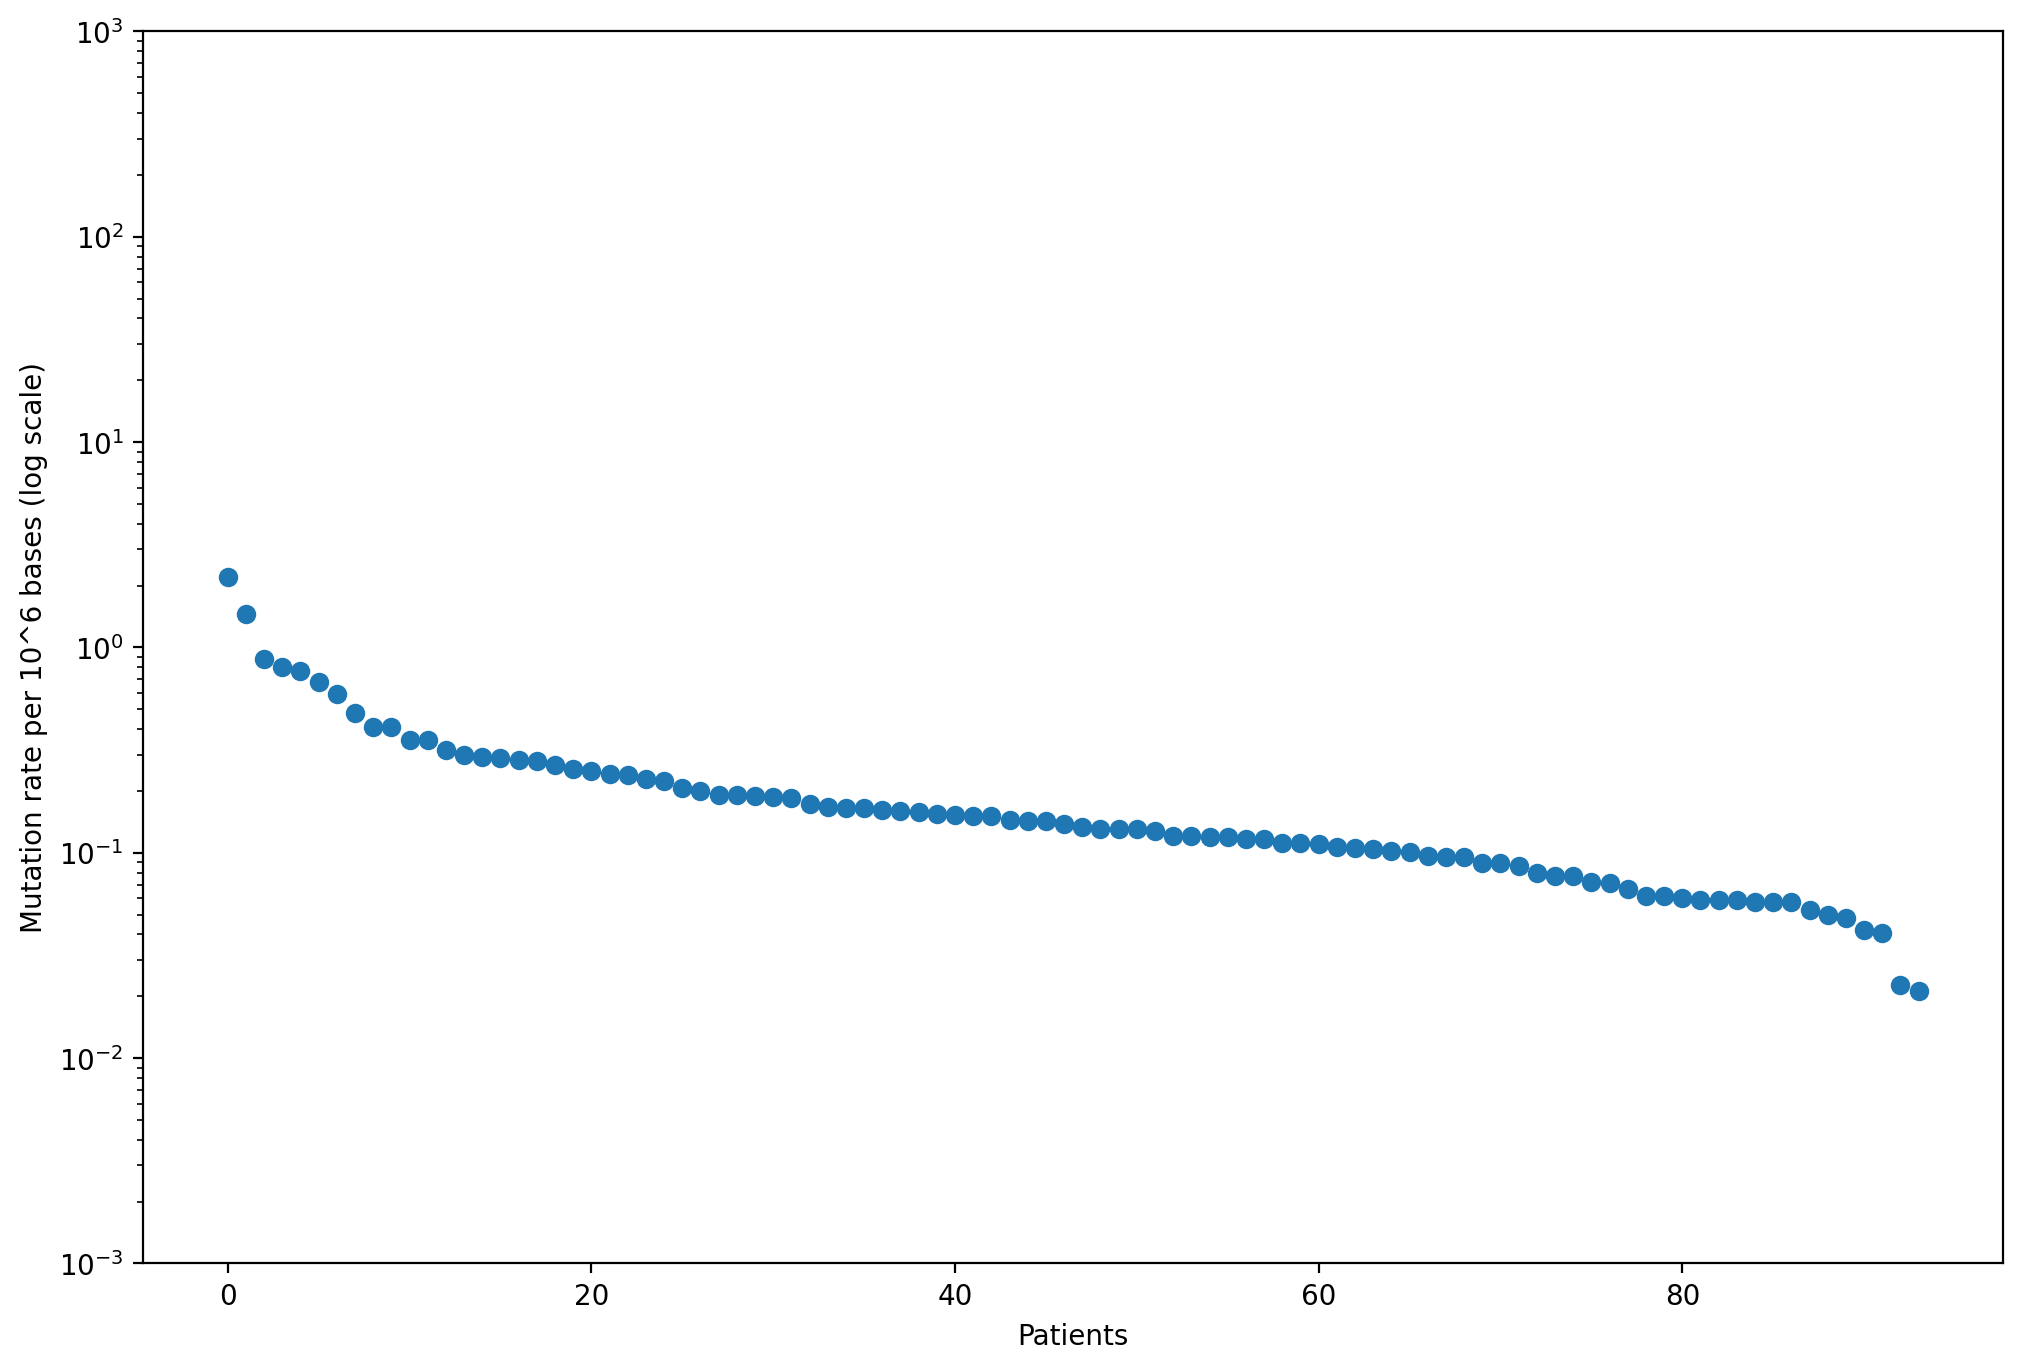

In [46]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [47]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]
genes_patients_ductal_NON_TN

,PATIENT_ID,Hugo_Symbol
0,X01BR008,RUNX3
1,X01BR008,NCDN
2,X01BR008,PLK3
3,X01BR008,CDCP2
4,X01BR008,DEPDC1
...,...,...
11406,X22BR006,ZNF652
11407,X22BR006,GALK1
11408,X22BR006,ZNF584
11409,X22BR006,ASXL1


In [48]:
# drop duplicates
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()
genes_patients_ductal_NON_TN

,PATIENT_ID,Hugo_Symbol
0,X01BR008,RUNX3
1,X01BR008,NCDN
2,X01BR008,PLK3
3,X01BR008,CDCP2
4,X01BR008,DEPDC1
...,...,...
11406,X22BR006,ZNF652
11407,X22BR006,GALK1
11408,X22BR006,ZNF584
11409,X22BR006,ASXL1


In [49]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)
n_of_pts_per_gene_ductal_NON_TN

,Hugo_Symbol,Num_pts_per_gene
0,A1CF,1
1,A2M,4
2,A2ML1,2
3,A4GALT,1
4,AADACL2,1
...,...,...
7180,ZSWIM5,1
7181,ZSWIM8,1
7182,ZW10,2
7183,ZYG11A,1


In [50]:
tot_pts_ductal_NON_TN = 94

In [51]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN
n_of_pts_per_gene_ductal_NON_TN

,Hugo_Symbol,Num_pts_per_gene,Mutation_frequency (%)
0,A1CF,1,1.063830
1,A2M,4,4.255319
2,A2ML1,2,2.127660
3,A4GALT,1,1.063830
4,AADACL2,1,1.063830
...,...,...,...
7180,ZSWIM5,1,1.063830
7181,ZSWIM8,1,1.063830
7182,ZW10,2,2.127660
7183,ZYG11A,1,1.063830


In [52]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)
n_of_pts_per_gene_ductal_NON_TN

,Hugo_Symbol,Num_pts_per_gene,Mutation_frequency (%)
6526,TTN,36,38.297872
4618,PIK3CA,31,32.978723
6367,TP53,29,30.851064
3809,MUC16,13,13.829787
4188,OBSCN,12,12.765957
...,...,...,...
2828,HTR2C,1,1.063830
2827,HTR1B,1,1.063830
2826,HSPB9,1,1.063830
2824,HSPA5,1,1.063830


In [53]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]
gene_mutation_frequency_ductal_NON_TN

,Hugo_Symbol,Mutation_frequency (%)
6526,TTN,38.297872
4618,PIK3CA,32.978723
6367,TP53,30.851064
3809,MUC16,13.829787
4188,OBSCN,12.765957
...,...,...
2828,HTR2C,1.063830
2827,HTR1B,1.063830
2826,HSPB9,1.063830
2824,HSPA5,1.063830


In [54]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)
highest_mutated_genes_ductal_NON_TN

,Hugo_Symbol,Mutation_frequency (%)
6526,TTN,38.297872
4618,PIK3CA,32.978723
6367,TP53,30.851064
3809,MUC16,13.829787
4188,OBSCN,12.765957
3539,MAP3K1,11.702128
3815,MUC5B,10.638298
2702,HERC1,10.638298
2264,FLG,10.638298
212,AHNAK,10.638298


In [55]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

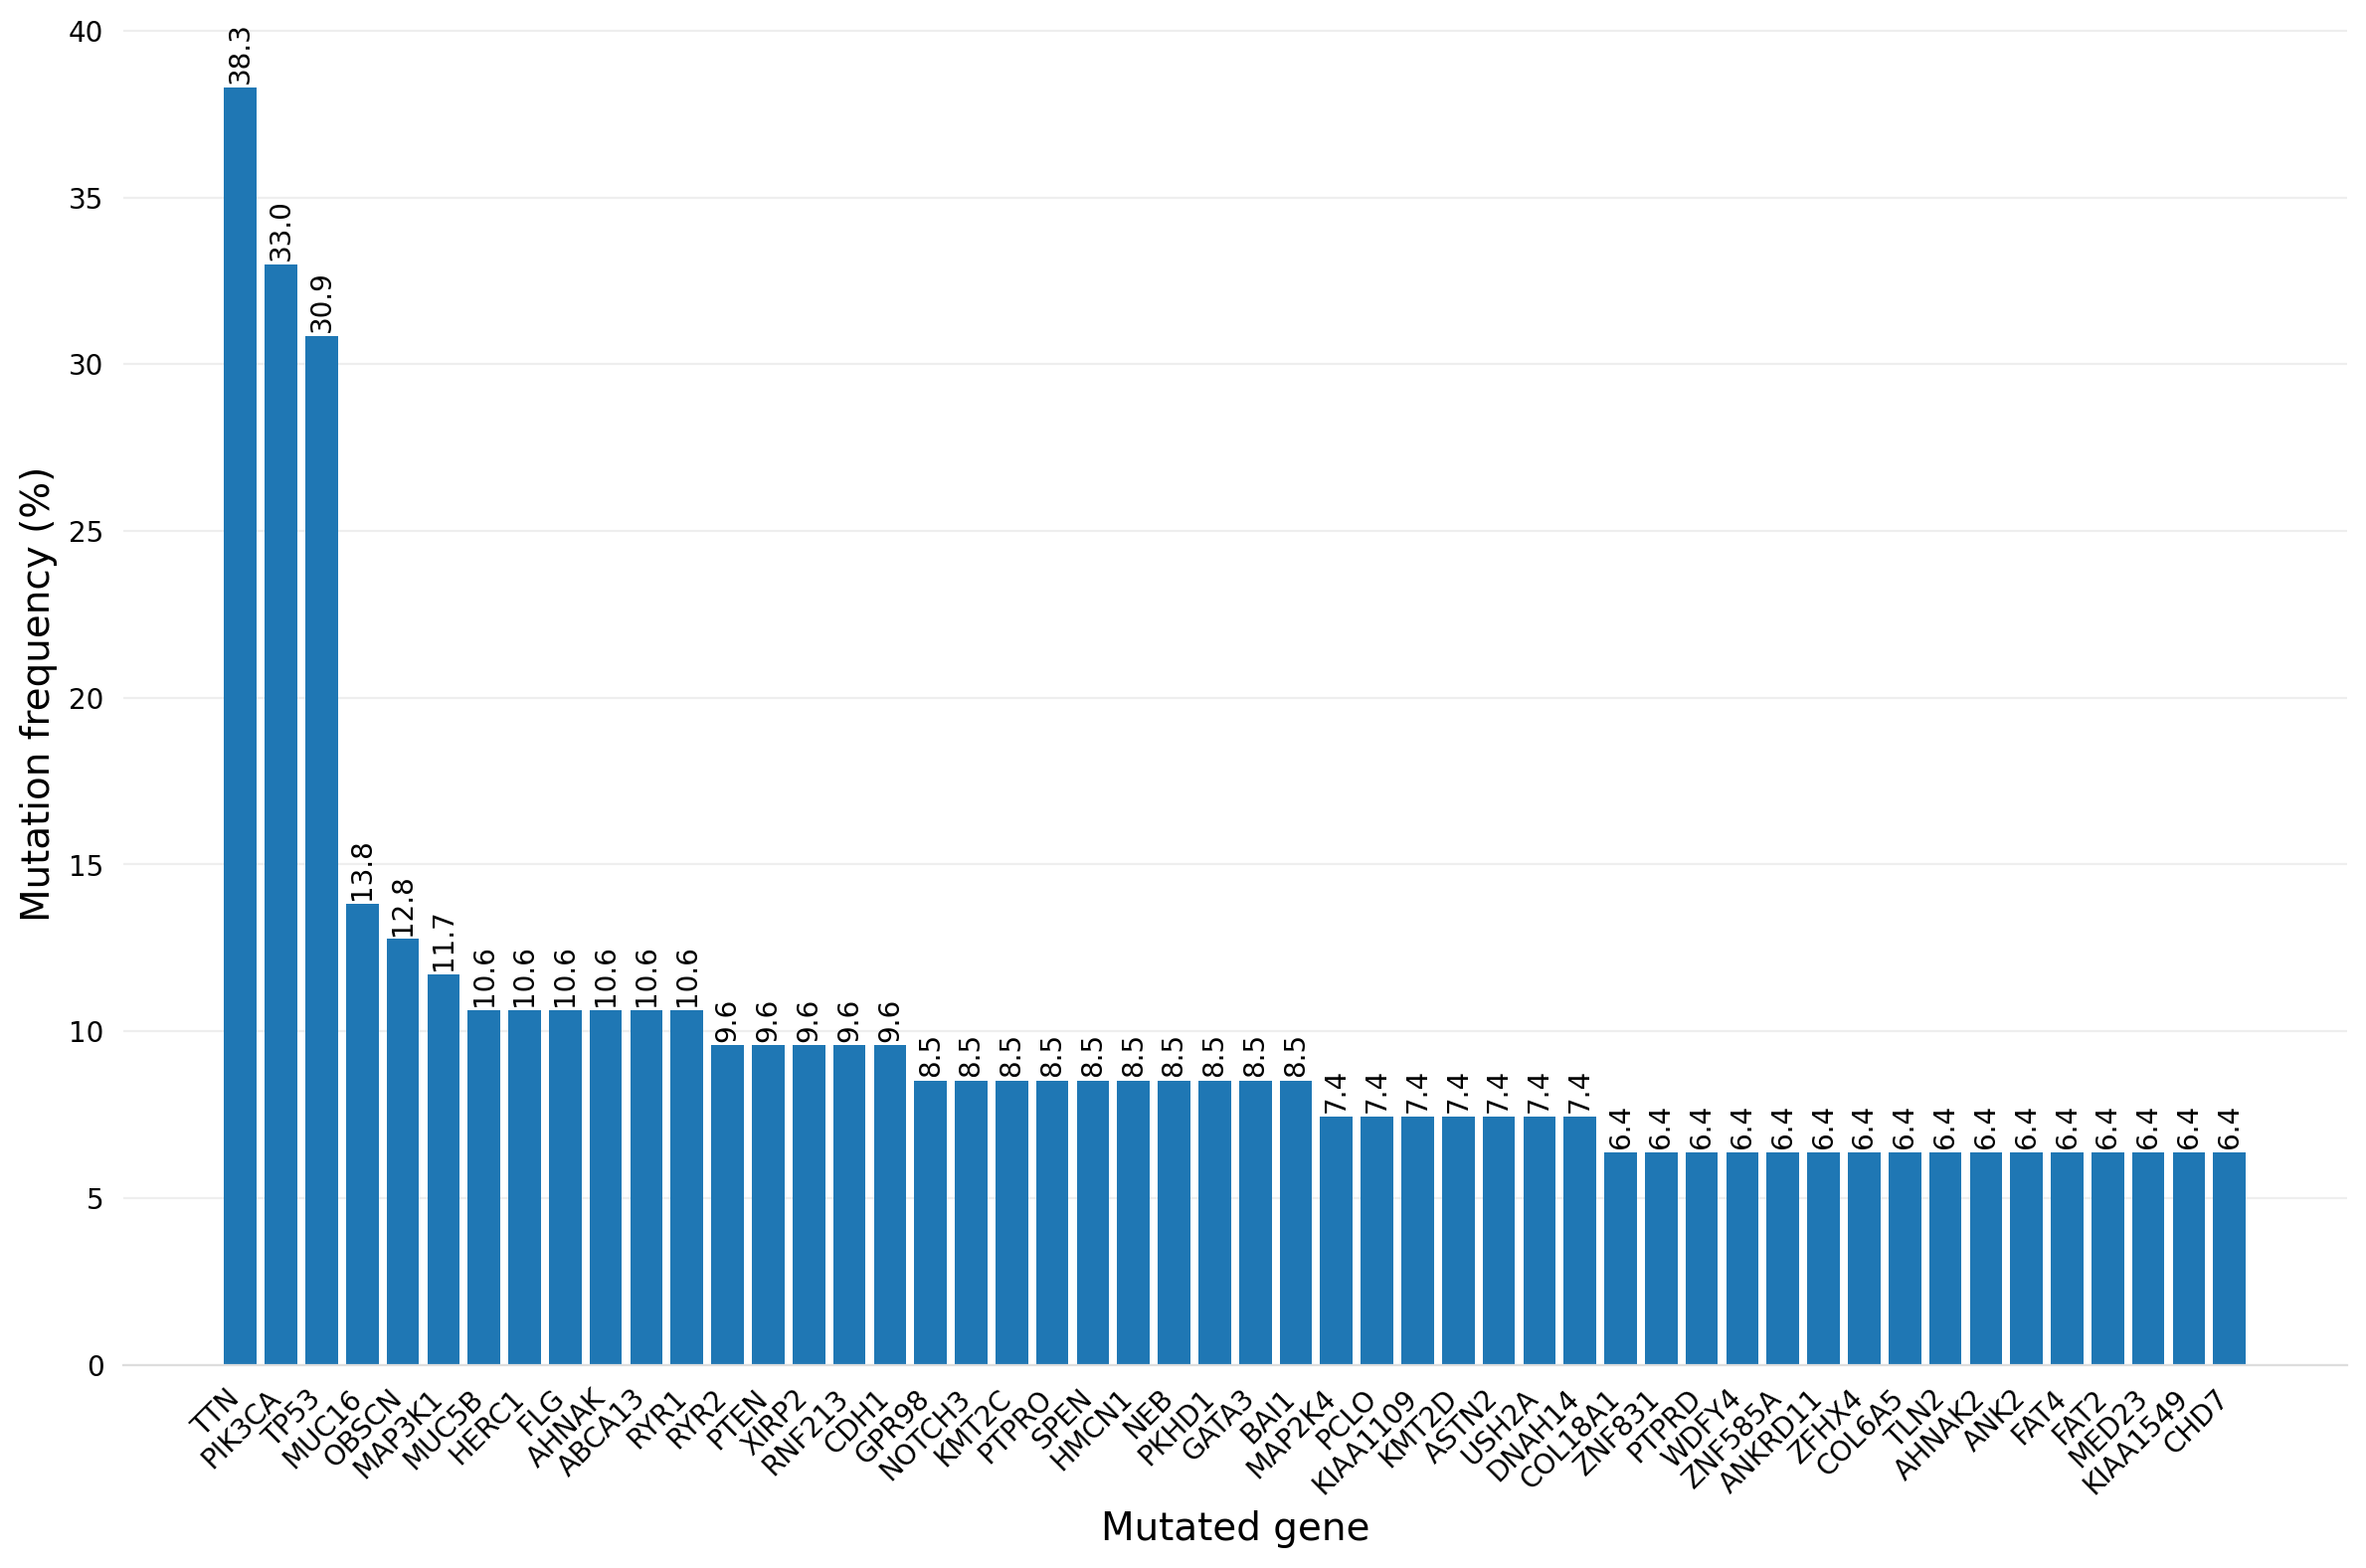

In [56]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()